<a href="https://colab.research.google.com/github/ChadDelany/causalpy_examples/blob/main/geolift_with_causalpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Geolift using CausalPy Library

This example is using simulated data and the example is from the CausalPy blog post at: https://causalpy.readthedocs.io/en/latest/notebooks/geolift1.html
<br>Accessed on 20221222. 
<br>Run on Google Colab.

In [ ]:
!pip install CausalPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 8.6 MB/s 
     |████████████████████████████████| 9.4 MB 46.5 MB/s 
  Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
     |████████████████████████████████| 12.2 MB 57.9 MB/s 
     |████████████████████████████████| 33.8 MB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 62.0 MB/s 
     |████████████████████████████████| 965 kB 66.8 MB/s 
     |████████████████████████████████| 295 kB 62.3 MB/s 
  Created wheel for CausalPy: filename=CausalPy-0.0.7-py3-none-any.whl size=86461 sha256=67e0e23b106a419792be93c6dbfed2f33dd00a7af628fc0a5e7440cfb2a4c14a
  Stored in directory: /root/.cache/pip/wheels/81/5e/be/b203b21d2633e5ea71916764fe03a78e45b4a862bee1

In [ ]:
import arviz as az
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import causalpy as cp

In [ ]:
%load_ext autoreload
%autoreload 2
pd.set_option("display.precision", 2)

In [ ]:
df = cp.load_data("geolift1")
# convert time column to datetime format
df["time"] = pd.to_datetime(df["time"])
df.set_index("time", inplace=True)
# define the treamtment time
treatment_time = pd.to_datetime("2022-01-01")
df.head()

,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech_Republic,Denmark
time,,,,,,,
2019-01-06,2.40,3.33,3.53,3.03,3.15,5.40,3.68
2019-01-13,2.41,3.22,3.50,2.96,3.14,5.19,3.40
2019-01-20,2.74,3.31,3.57,2.93,3.40,5.21,3.57
2019-01-27,2.70,3.36,3.43,2.94,3.43,5.10,3.64
2019-02-03,2.63,3.39,3.50,3.07,3.48,5.10,3.65


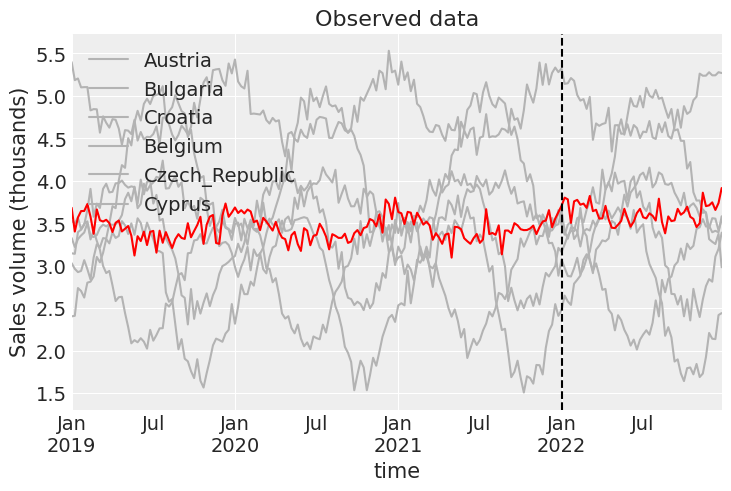

In [ ]:
untreated = list(set(df.columns).difference({"Denmark"}))
ax = df[untreated].plot(color=[0.7, 0.7, 0.7])
df["Denmark"].plot(color="r", ax=ax)
ax.axvline(treatment_time, color="k", linestyle="--")
ax.set(title="Observed data", ylabel="Sales volume (thousands)");

```
import my_custom_scikit_learn_model as weighted_combination

# fit the model to pre-intervention (training) data
weighted_combination.fit(X_train, y_train)
# estimate the counterfactual given post-intervention (test) data
counterfactual = weighted_combination.predict(X_test)
# estimate the causal impact
causal_impact = y_test - counterfactual
# cumulative causal impact
np.cumsum(causal_impact)
```

In [ ]:
result = cp.pymc_experiments.SyntheticControl(
    df,
    treatment_time,
    formula="Denmark ~ 0 + Austria + Belgium + Bulgaria + Croatia + Cyprus + Czech_Republic",
    prediction_model=cp.pymc_models.WeightedSumFitter(
        sample_kwargs={"target_accept": 0.95}
    ),
)

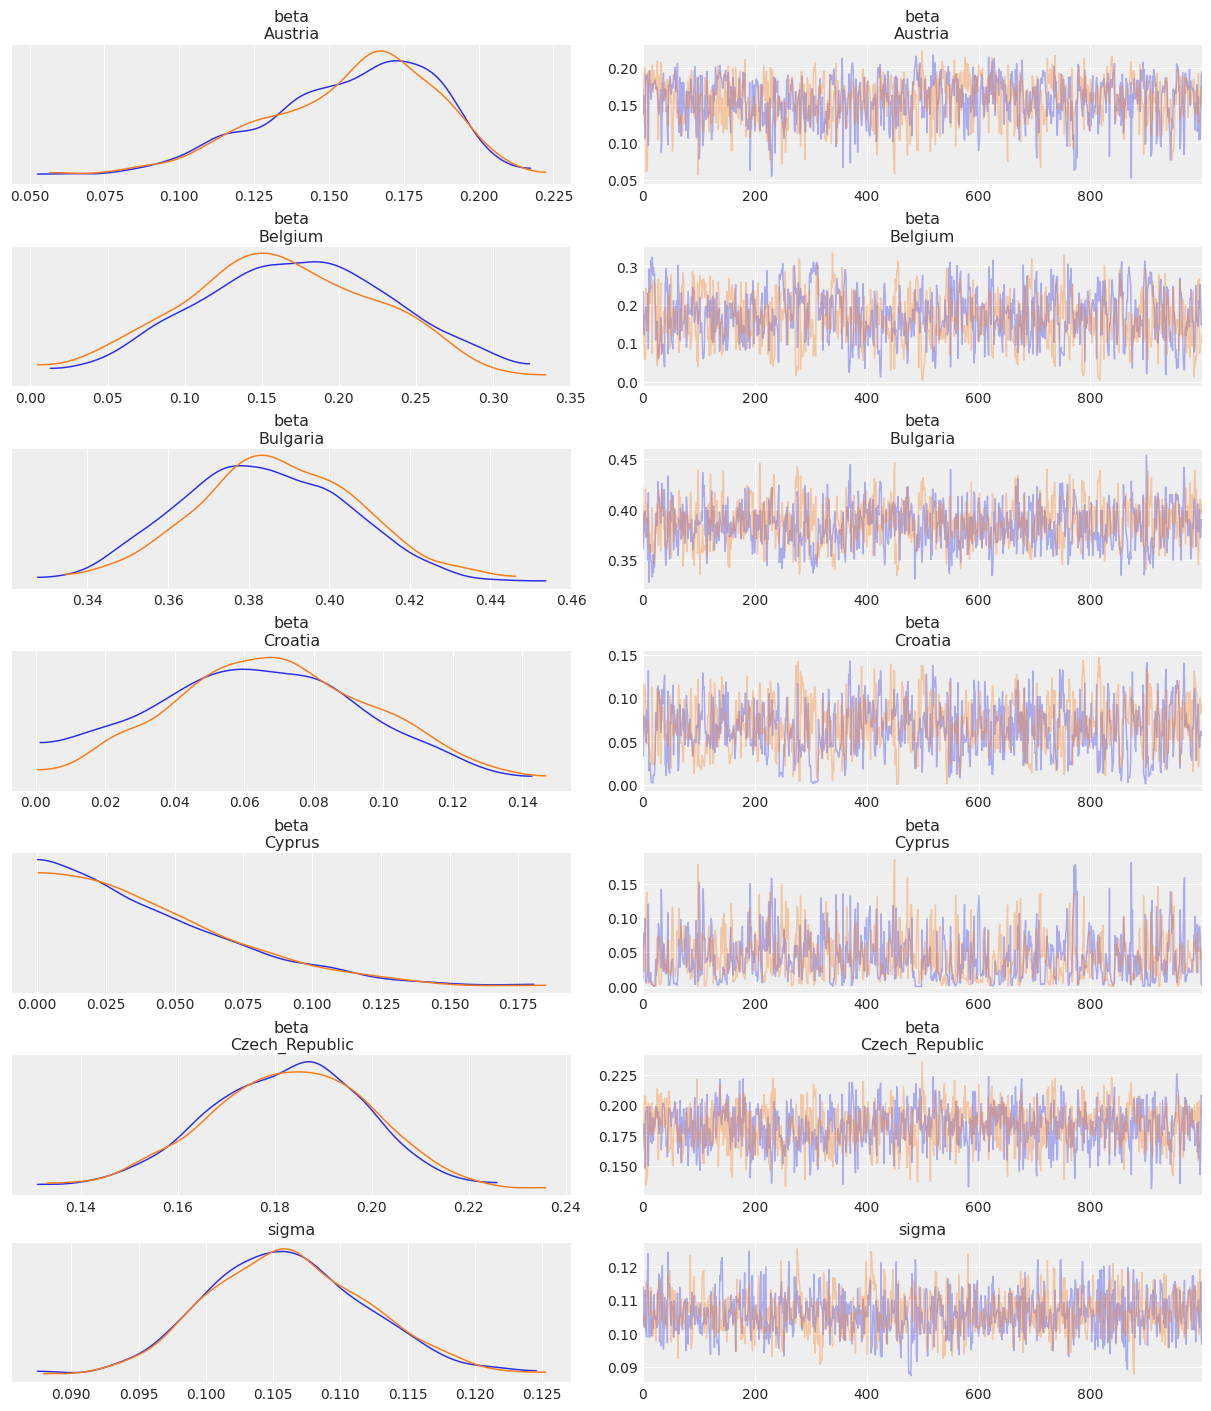

In [ ]:
az.summary(result.idata, round_to=2)
az.plot_trace(result.idata, var_names=["~mu"], compact=False);

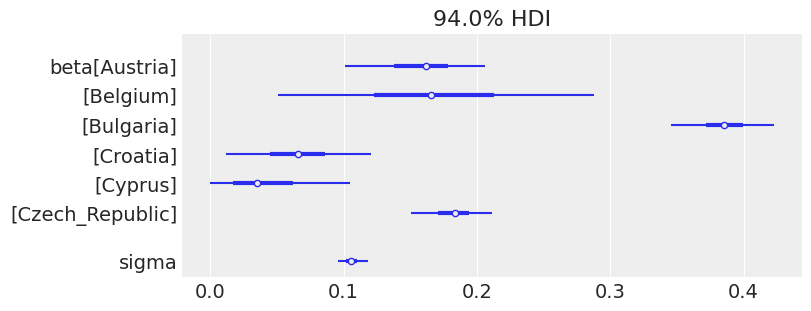

In [ ]:
az.plot_forest(result.idata, var_names=["~mu"], figsize=(8, 3), combined=True);

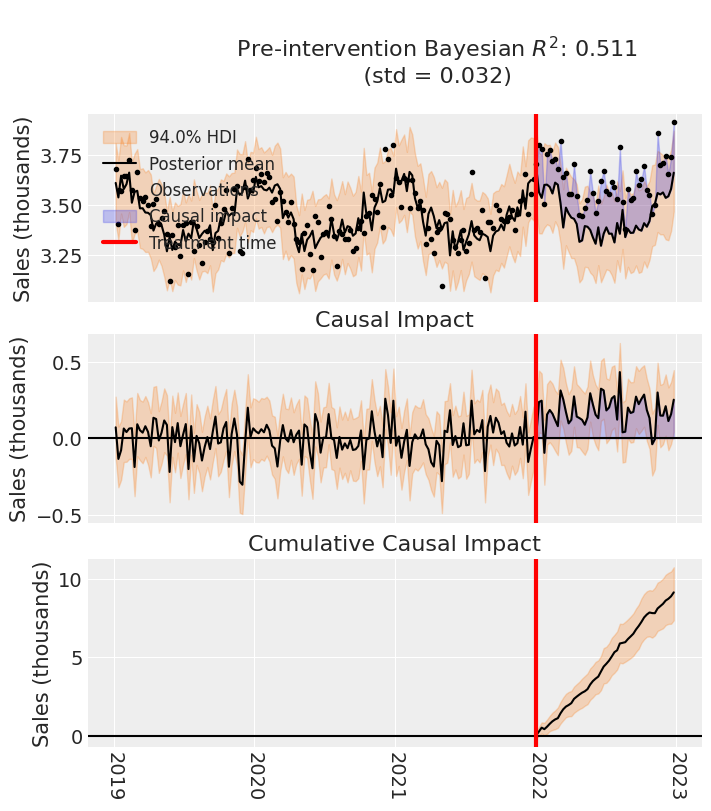

In [ ]:
fig, ax = result.plot(plot_predictors=False)

# formatting
ax[2].tick_params(axis="x", labelrotation=-90)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax[2].xaxis.set_major_locator(mdates.YearLocator())
for i in [0, 1, 2]:
    ax[i].set(ylabel="Sales (thousands)")

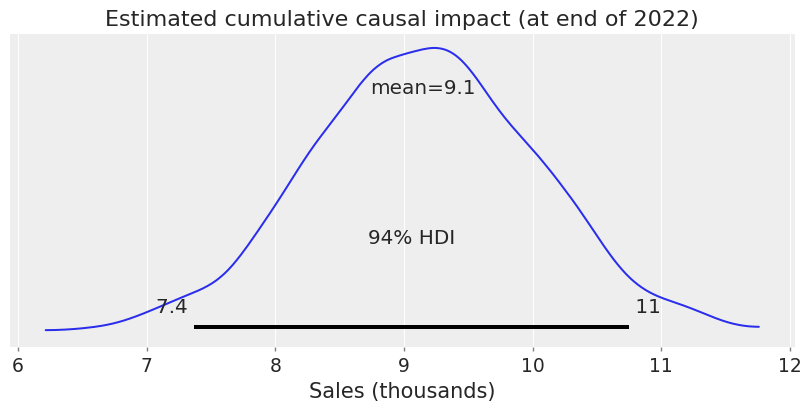

In [ ]:
# get index of the final time point
index = result.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate = result.post_impact_cumulative.sel({"obs_ind": index})
# get summary stats
ax = az.plot_posterior(last_cumulative_estimate, figsize=(8, 4))
ax.set(
    title="Estimated cumulative causal impact (at end of 2022)",
    xlabel="Sales (thousands)",
);

In [ ]:
az.summary(last_cumulative_estimate, kind="stats")

,mean,sd,hdi_3%,hdi_97%
x,9.15,0.89,7.37,10.75
